# All Loads with Power Limit Testing

## Overview

1. Test Case 1: Power limit is so high that it does no effect for constraint.
2. Test Case 2: Power limit at one time step changes.
3. Test Case 3: Power limit at one mroe time step changes.
4. Test Case 4: Power limit becomes very constricted and there is no solution.

In [1]:
import numpy as np
from All_with_Power_Limit_MILP import All_with_Power_Limit_MILP

import matplotlib.pyplot as plt

## Test Case 1

Optimize a model with 41 rows, 35 columns and 125 nonzeros
Variable types: 25 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e+02, 1e+04]
  Bounds range     [1e+00, 2e+01]
  RHS range        [1e+00, 4e+02]
Presolve removed 26 rows and 15 columns
Presolve time: 0.21s
Presolved: 15 rows, 20 columns, 47 nonzeros
Variable types: 15 continuous, 5 integer (5 binary)

Root relaxation: objective 2.872076e+04, 11 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 28720.7571    0    2          - 28720.7571      -     -    0s
H    0     0                    31577.900000 28720.7571  9.05%     -    0s
*    0     0               0    30777.900000 30777.9000  0.00%     -    0s

Explored 1 nodes (16 simplex iterations) in 0.28 seconds
Thread count was 4 (of 4 available processors)

Solution count 2:

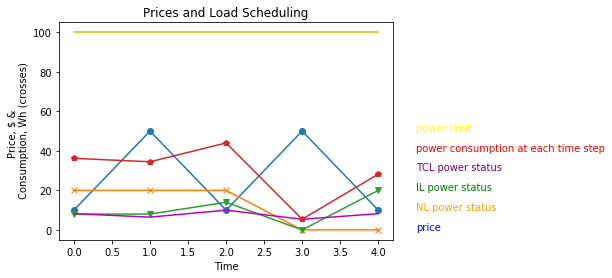

In [2]:
# Parameter Setting
# For All
pr = np.array([10, 50, 10, 50, 10])
N = len(pr)
dt = 10
P_limit = np.array([100, 100, 100, 100, 100])
# For NL
L = 3
P_NL = 20
# For IL
P_IL = 20
E_IL = 500
T_off = 3
Pmin = 0.4 * P_IL
# For TCL
P_TCL = 10
c_water = 0.073
m = 50
temp_up = 25
temp_o = 20
temp_req = 60
temp_en = np.array([25, 20, 18, 15, 15])
di = np.array([25, 27, 28, 22, 25])

# MILP Solution
solution = All_with_Power_Limit_MILP(dt, pr, P_limit, L, P_NL, P_IL, E_IL, T_off, Pmin, P_TCL, c_water, m, temp_up, temp_o,
temp_req, temp_en, di)

# Plot
fig, ax = plt.subplots()

ax.plot(pr, 'o-')
ax.plot(P_NL * solution[0][0:N], 'x-')
ax.plot(solution[0][N:2 * N], 'v-')
ax.plot(solution[0][6 * N:7 * N], 'm-')
ax.plot(P_NL * solution[0][0:N] + solution[0][N:2 * N] + solution[0][6 * N:7 * N], 'p-')
ax.plot(P_limit, 'y-')

ax.text(4.5,0,'price',color='blue')
ax.text(4.5,10,'NL power status',color='orange')
ax.text(4.5,20,'IL power status',color='green')
ax.text(4.5,30,'TCL power status',color='purple')
ax.text(4.5,40,'power consumption at each time step',color='red')
ax.text(4.5,50,'power limit',color='yellow')

ax.plot()
ax.set(xlabel='Time', ylabel='Price, $ & \n Consumption, Wh (crosses)',
       title='Prices and Load Scheduling');

Comments: Power limit is set as high as above the total power consumption at each time step and thus the result can be treated as without power limit

## Test Case 2

Optimize a model with 41 rows, 35 columns and 125 nonzeros
Variable types: 25 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e+02, 1e+04]
  Bounds range     [1e+00, 2e+01]
  RHS range        [1e+00, 4e+02]
Presolve removed 26 rows and 15 columns
Presolve time: 0.00s
Presolved: 15 rows, 20 columns, 47 nonzeros
Variable types: 15 continuous, 5 integer (5 binary)

Root relaxation: objective 2.872076e+04, 11 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 28720.7571    0    2          - 28720.7571      -     -    0s
H    0     0                    31577.900000 28720.7571  9.05%     -    0s
*    0     0               0    30777.900000 30777.9000  0.00%     -    0s

Explored 1 nodes (16 simplex iterations) in 0.05 seconds
Thread count was 4 (of 4 available processors)

Solution count 2:

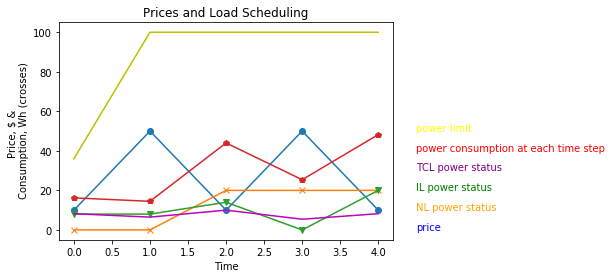

In [3]:
# Parameter Setting
# For All
pr = np.array([10, 50, 10, 50, 10])
N = len(pr)
dt = 10
P_limit = np.array([36, 100, 100, 100, 100])
# For NL
L = 3
P_NL = 20
# For IL
P_IL = 20
E_IL = 500
T_off = 3
Pmin = 0.4 * P_IL
# For TCL
P_TCL = 10
c_water = 0.073
m = 50
temp_up = 25
temp_o = 20
temp_req = 60
temp_en = np.array([25, 20, 18, 15, 15])
di = np.array([25, 27, 28, 22, 25])

# MILP Solution
solution = All_with_Power_Limit_MILP(dt, pr, P_limit, L, P_NL, P_IL, E_IL, T_off, Pmin, P_TCL, c_water, m, temp_up, temp_o,
temp_req, temp_en, di)

# Plot
fig, ax = plt.subplots()

ax.plot(pr, 'o-')
ax.plot(P_NL * solution[0][0:N], 'x-')
ax.plot(solution[0][N:2 * N], 'v-')
ax.plot(solution[0][6 * N:7 * N], 'm-')
ax.plot(P_NL * solution[0][0:N] + solution[0][N:2 * N] + solution[0][6 * N:7 * N], 'p-')
ax.plot(P_limit, 'y-')

ax.text(4.5,0,'price',color='blue')
ax.text(4.5,10,'NL power status',color='orange')
ax.text(4.5,20,'IL power status',color='green')
ax.text(4.5,30,'TCL power status',color='purple')
ax.text(4.5,40,'power consumption at each time step',color='red')
ax.text(4.5,50,'power limit',color='yellow')

ax.plot()
ax.set(xlabel='Time', ylabel='Price, $ & \n Consumption, Wh (crosses)',
       title='Prices and Load Scheduling');

Comments: Compared with Test Case 1, power limit at the 1st time step is constricted and the only change in result is NL distribution. The total cost is still the same as that in Test Case 1.

## Test Case 3

Optimize a model with 41 rows, 35 columns and 125 nonzeros
Variable types: 25 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e+02, 1e+04]
  Bounds range     [1e+00, 2e+01]
  RHS range        [1e+00, 4e+02]
Presolve removed 21 rows and 12 columns
Presolve time: 0.00s
Presolved: 20 rows, 23 columns, 66 nonzeros
Variable types: 18 continuous, 5 integer (5 binary)

Root relaxation: objective 2.963102e+04, 8 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 29631.0250    0    2          - 29631.0250      -     -    0s
H    0     0                    31577.900000 29631.0250  6.17%     -    0s
H    0     0                    30862.900000 29631.0250  3.99%     -    0s

Explored 1 nodes (8 simplex iterations) in 0.02 seconds
Thread count was 4 (of 4 available processors)

Solution count 2: 3

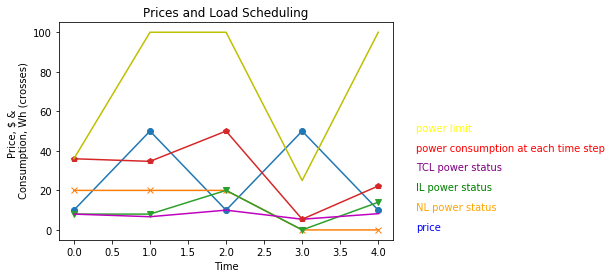

In [4]:
# Parameter Setting
# For All
pr = np.array([10, 50, 10, 50, 10])
N = len(pr)
dt = 10
P_limit = np.array([36, 100, 100, 25, 100])
# For NL
L = 3
P_NL = 20
# For IL
P_IL = 20
E_IL = 500
T_off = 3
Pmin = 0.4 * P_IL
# For TCL
P_TCL = 10
c_water = 0.073
m = 50
temp_up = 25
temp_o = 20
temp_req = 60
temp_en = np.array([25, 20, 18, 15, 15])
di = np.array([25, 27, 28, 22, 25])

# MILP Solution
solution = All_with_Power_Limit_MILP(dt, pr, P_limit, L, P_NL, P_IL, E_IL, T_off, Pmin, P_TCL, c_water, m, temp_up, temp_o,
temp_req, temp_en, di)

# Plot
fig, ax = plt.subplots()

ax.plot(pr, 'o-')
ax.plot(P_NL * solution[0][0:N], 'x-')
ax.plot(solution[0][N:2 * N], 'v-')
ax.plot(solution[0][6 * N:7 * N], 'm-')
ax.plot(P_NL * solution[0][0:N] + solution[0][N:2 * N] + solution[0][6 * N:7 * N], 'p-')
ax.plot(P_limit, 'y-')

ax.text(4.5,0,'price',color='blue')
ax.text(4.5,10,'NL power status',color='orange')
ax.text(4.5,20,'IL power status',color='green')
ax.text(4.5,30,'TCL power status',color='purple')
ax.text(4.5,40,'power consumption at each time step',color='red')
ax.text(4.5,50,'power limit',color='yellow')

ax.plot()
ax.set(xlabel='Time', ylabel='Price, $ & \n Consumption, Wh (crosses)',
       title='Prices and Load Scheduling');

Comments: Compared with Test Case 2, the only change is power limit constriction at the 4th time step. However, this change causes the distribution of three types of loads all to change. The total also cost increases which is reasonable, as the more strict constraints we have, the higher cost it will take.  

## Test Case 4

In [5]:
# Parameter Setting
# For All
pr = np.array([10, 50, 10, 50, 10])
N = len(pr)
dt = 10
P_limit = np.array([30, 35, 30, 25, 50])
# For NL
L = 3
P_NL = 20
# For IL
P_IL = 20
E_IL = 500
T_off = 3
Pmin = 0.4 * P_IL
# For TCL
P_TCL = 10
c_water = 0.073
m = 50
temp_up = 25
temp_o = 20
temp_req = 60
temp_en = np.array([25, 20, 18, 15, 15])
di = np.array([25, 27, 28, 22, 25])

# MILP Solution
solution = All_with_Power_Limit_MILP(dt, pr, P_limit, L, P_NL, P_IL, E_IL, T_off, Pmin, P_TCL, c_water, m, temp_up, temp_o,
temp_req, temp_en, di)

# Plot
fig, ax = plt.subplots()

ax.plot(pr, 'o-')
ax.plot(P_NL * solution[0][0:N], 'x-')
ax.plot(solution[0][N:2 * N], 'v-')
ax.plot(solution[0][6 * N:7 * N], 'm-')
ax.plot(P_NL * solution[0][0:N] + solution[0][N:2 * N] + solution[0][6 * N:7 * N], 'p-')
ax.plot(P_limit, 'y-')

ax.text(4.5,0,'price',color='blue')
ax.text(4.5,10,'NL power status',color='orange')
ax.text(4.5,20,'IL power status',color='green')
ax.text(4.5,30,'TCL power status',color='purple')
ax.text(4.5,40,'power consumption at each time step',color='red')
ax.text(4.5,50,'power limit',color='yellow')

ax.plot()
ax.set(xlabel='Time', ylabel='Price, $ & \n Consumption, Wh (crosses)',
       title='Prices and Load Scheduling');

Optimize a model with 41 rows, 35 columns and 125 nonzeros
Variable types: 25 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e+02, 1e+04]
  Bounds range     [1e+00, 2e+01]
  RHS range        [1e+00, 4e+02]
Presolve removed 26 rows and 20 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 4 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -


AttributeError: b"Unable to retrieve attribute 'x'"

Comments: When constraint becomes much more tightened, it's very likely that there is no solution.